In [1004]:
# Import needed packages
# pip install folium #if needed
import folium
from folium.plugins import MarkerCluster
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import seaborn as sns
import numpy as np
import datetime as dt
# ML classifiers and performance metrics
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

In [1005]:
# Read CSV data
df_fights = pd.read_csv('masterdataframe.csv')
df_mma_fighters = pd.read_csv('pro_mma_fighters.csv.xls', parse_dates=True)
df_coordinates = pd.read_csv('country_coordinates.csv')

# Data Exploration
In the following cells, we can view what kind of data we have.

In [1006]:
df_fights.head()   # shape:(11842, 112)

,date,fight_url,event_url,result,fighter,opponent,division,stance,dob,method,...,recent_avg_clinch_strikes_attempts_per_min,precomp_recent_avg_clinch_strikes_attempts_per_min,avg_ground_strikes_landed_per_min,precomp_avg_ground_strikes_landed_per_min,recent_avg_ground_strikes_landed_per_min,precomp_recent_avg_ground_strikes_landed_per_min,avg_ground_strikes_attempts_per_min,precomp_avg_ground_strikes_attempts_per_min,recent_avg_ground_strikes_attempts_per_min,precomp_recent_avg_ground_strikes_attempts_per_min
0,1994-03-11,http://ufcstats.com/fight-details/4acab67848e7...,http://ufcstats.com/event-details/a6a9ab5a824e...,0,Sean Daugherty,Scott Morris,Open Weight,NaN,1975-12-04,SUB,...,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
1,1994-03-11,http://ufcstats.com/fight-details/4acab67848e7...,http://ufcstats.com/event-details/a6a9ab5a824e...,1,Scott Morris,Sean Daugherty,Open Weight,Orthodox,NaN,SUB,...,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
2,1994-03-11,http://ufcstats.com/fight-details/4b9ae533ccb3...,http://ufcstats.com/event-details/a6a9ab5a824e...,0,Ray Wizard,Patrick Smith,Open Weight,NaN,NaN,SUB,...,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
3,1994-03-11,http://ufcstats.com/fight-details/4b9ae533ccb3...,http://ufcstats.com/event-details/a6a9ab5a824e...,1,Patrick Smith,Ray Wizard,Open Weight,Orthodox,1963-08-28,SUB,...,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
4,1994-03-11,http://ufcstats.com/fight-details/ccee020be2e8...,http://ufcstats.com/event-details/a6a9ab5a824e...,0,David Levicki,Johnny Rhodes,Open Weight,NaN,NaN,KO/TKO,...,NaN,NaN,0.081855,NaN,NaN,NaN,0.081855,NaN,NaN,NaN


In [1007]:
df_mma_fighters.head()  # shape: (5151, 22)

,url,fighter_name,nickname,birth_date,age,death_date,location,country,height,weight,...,wins,wins_ko,wins_submission,wins_decision,wins_other,lossess,losses_ko,losses_submission,losses_decision,losses_other
0,/fighter/Kharun-Atlangeriev-167431,Kharun Atlangeriev,Predator,05/10/1992,28.0,NaN,NaN,Russia,"5'10""",155 lbs,...,11,5,5,1,NaN,11,0,1,1,NaN
1,/fighter/Shojin-Miki-157565,Shojin Miki,Mini Margarito,NaN,NaN,NaN,"Honolulu, Hawaii",United States,"5'9""",125 lbs,...,6,2,4,0,NaN,6,2,0,5,NaN
2,/fighter/Ryan-Keenan-33827,Ryan Keenan,Who Dat?,15/06/1985,36.0,NaN,"Windermere, Florida",United States,"6'0""",155 lbs,...,6,3,3,0,NaN,6,1,1,0,NaN
3,/fighter/Dustin-Jacoby-73825,Dustin Jacoby,The Hanyak,04/04/1988,33.0,NaN,"Arenzville, Illinois",United States,"6'4""",205 lbs,...,14,9,1,4,NaN,14,1,2,2,NaN
4,/fighter/Richardson-Moreira-72825,Richardson Moreira,Rick Monstro,31/03/1984,37.0,NaN,"Campinas, Sao Paulo",Brazil,"6'2""",205 lbs,...,8,2,5,1,NaN,8,1,1,3,NaN


In [1008]:
df_coordinates.head()   # shape: (245,8)

,country_code,latitude,longitude,country,usa_state_code,usa_state_latitude,usa_state_longitude,usa_state
0,AD,42.546245,1.601554,Andorra,AK,63.588753,-154.493062,Alaska
1,AE,23.424076,53.847818,United Arab Emirates,AL,32.318231,-86.902298,Alabama
2,AF,33.939110,67.709953,Afghanistan,AR,35.201050,-91.831833,Arkansas
3,AG,17.060816,-61.796428,Antigua and Barbuda,AZ,34.048928,-111.093731,Arizona
4,AI,18.220554,-63.068615,Anguilla,CA,36.778261,-119.417932,California


In [1009]:
df_coordinates = df_coordinates.drop(columns=['country_code', 'usa_state_code','usa_state_latitude', 'usa_state_longitude', 'usa_state'])
df_coordinates.head()

,latitude,longitude,country
0,42.546245,1.601554,Andorra
1,23.424076,53.847818,United Arab Emirates
2,33.939110,67.709953,Afghanistan
3,17.060816,-61.796428,Antigua and Barbuda
4,18.220554,-63.068615,Anguilla


In [1010]:
df_ufc_fighters = pd.DataFrame(df_fights.drop_duplicates("fighter")["fighter"])
print(f"There were {len(df_fights)//2} total fights and {df_ufc_fighters.shape[0]} fighters from {df_fights.date.min()} to {df_fights.date.max()}.")

There were 6661 total fights and 2261 fighters from 1994-03-11 to 2022-06-25.


# Data Visualization:
We can visualize different aspects of the data, such as 
* yearly fights 
* average duration vs % of finish method (for example, knock out or submission)
* percentage of male vs female fights

We can also look at data broken down by division: 
* ground vs striking
* average competition time
* seconds needed for knock out
* seconds needed for submission
* strikes in standup per minute
* ground control vs significant strikes

In [1011]:
df_fights = df_fights.loc[:,:"ground_strikes_def_differential"]
df_fights["year"] = pd.DatetimeIndex(df_fights['date']).year

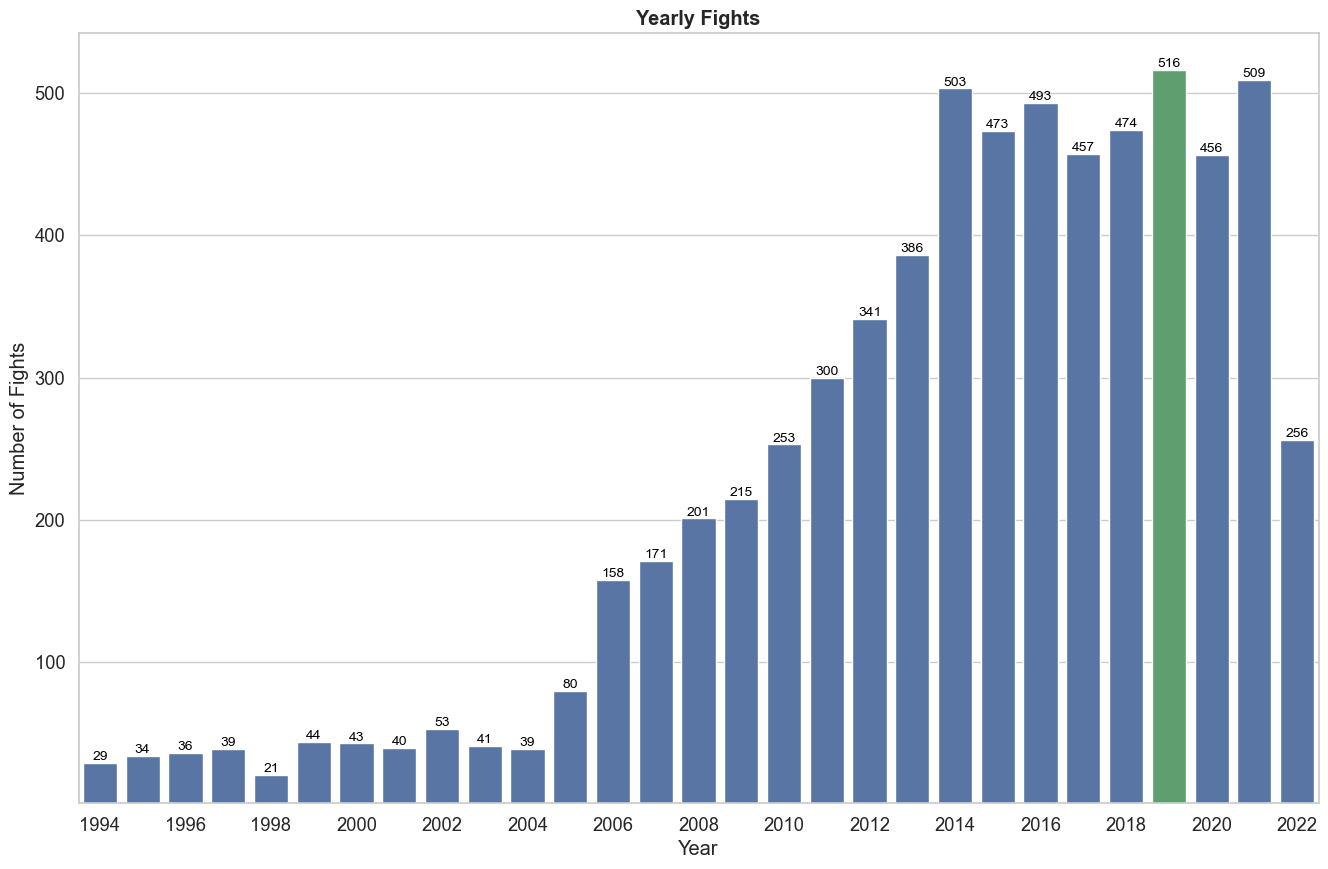

In [1012]:
df_fights_per_year = pd.DataFrame(df_fights.groupby("year")["result"].count()//2).rename(columns={"result":"fights per year"})
plt_colors = ['g' if (y == max(df_fights_per_year["fights per year"])) else 'b' for y in df_fights_per_year["fights per year"]]
plt.figure(figsize=(16,10))
sns.set(font_scale = 1.2, style="whitegrid")
bar = sns.barplot(x=df_fights_per_year.index, y=(df_fights_per_year["fights per year"]), palette=plt_colors)

ax = plt.gca()
ax.xaxis.set_major_locator(tck.MultipleLocator(2))
ax.set_ylim(1)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height().astype(int), fontsize=10, color='black', ha='center', va='bottom')
    
plt.title('Yearly Fights',weight='bold')
plt.xlabel('Year')
plt.ylabel('Number of Fights')
plt.show()

In [1013]:
df_map = df_fights.copy()
df_map["method"] = df_map["method"].replace({"M-DEC":"DEC", "S-DEC":"DEC", "U-DEC":"DEC", "DRAW":"DEC"})

df_map = df_map.groupby("year")["method"].value_counts(normalize=True)
df_map = df_map.mul(100)
df_map = df_map.rename('percent').reset_index()

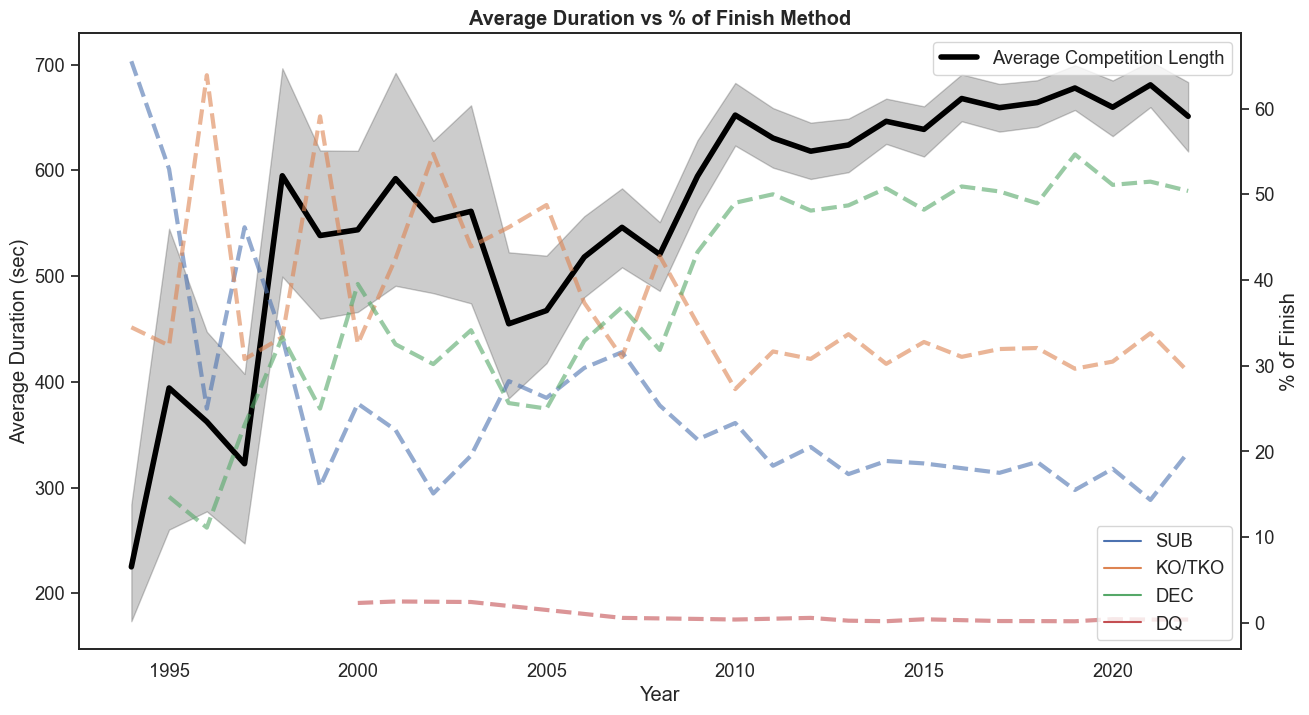

In [1014]:
sns.set_style("white")
fig, ax = plt.subplots(figsize=(15,8))
g = sns.lineplot(x="year", y="total_comp_time", data=df_fights, color='black', ax=ax, linewidth=4, label="Average Competition Length")
ax1=ax.twinx()
g1 = sns.lineplot(x="year", y='percent', hue ="method", data=df_map, markers=True, linewidth=3, ax=ax1, alpha=0.6, linestyle='--')
g.set_title("Average Duration vs % of Finish Method", weight='bold')
ax.set(xlabel='Year')
ax.set(ylabel='Average Duration (sec)')
ax1.set(ylabel='% of Finish')
ax1.legend(loc="lower right")
plt.xticks(rotation=90)
plt.show()

In [1015]:
# Fighters by country 
df_ufc_fighters = df_ufc_fighters.merge(df_mma_fighters[["fighter_name", "country"]], right_on="fighter_name", left_on="fighter", how='left').drop(columns=['fighter_name'])
df_fighter_locations = df_ufc_fighters.merge(df_coordinates, right_on='country', left_on='country', how='left').dropna()

In [1016]:
df_fights.division.value_counts(normalize=True)

Lightweight              0.177301
Welterweight             0.174448
Middleweight             0.134664
Heavyweight              0.095031
Featherweight            0.093980
Light Heavyweight        0.091728
Bantamweight             0.082420
Flyweight                0.039333
Women's Strawweight      0.035280
Women's Bantamweight     0.025372
Women's Flyweight        0.024771
Open Weight              0.015313
Catch Weight             0.006756
Women's Featherweight    0.003453
Super Heavyweight        0.000150
Name: division, dtype: float64

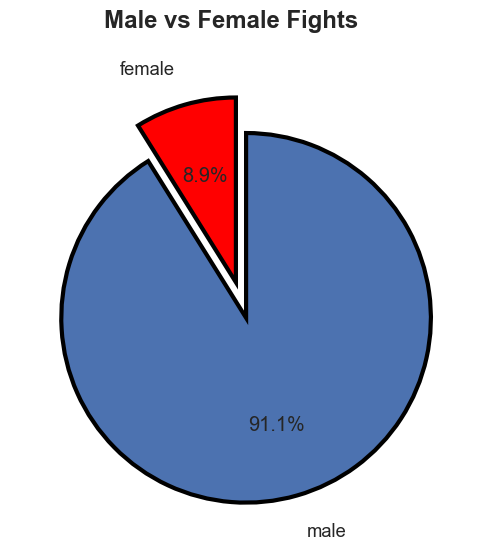

In [1017]:
df_fights["gender"] = df_fights.division.apply(lambda x: "female" if x[0:5]=="Women" else "male")

plt.figure(figsize=(8,6))
plt.pie(df_fights.groupby(["gender"])["gender"].count()/2,explode=(0.1,0.1), autopct='%1.1f%%', labels={"female", "male"},
        startangle=90,colors=["red","b"],wedgeprops={"linewidth":3, "edgecolor":"black"},labeldistance=1.2)

plt.suptitle("Male vs Female Fights", weight='bold')

plt.show()

In [1018]:
df_fights = df_fights[df_fights.gender=="male"]
df_fights = df_fights[~df_fights["division"].isin(["Open Weight", "Catch Weight", "Super Heavyweight"])]
weights = df_fights.division.unique()

In [1019]:
fight_details = df_fights.pivot_table(values="result", columns="method", index="division", fill_value=0, aggfunc="count").apply(lambda x: x//2)
fight_details["total_fights"] = fight_details.iloc[:,0:len(fight_details.columns)-1].sum(axis=1)
fight_details

method,DQ,DRAW,KO/TKO,M-DEC,S-DEC,SUB,U-DEC,total_fights
division,,,,,,,,
Bantamweight,1,15,156,3,68,114,192,357
Featherweight,1,14,165,4,64,101,277,349
Flyweight,0,4,59,0,34,50,115,147
Heavyweight,3,12,341,9,28,96,144,489
Light Heavyweight,3,15,266,6,43,104,174,437
Lightweight,2,21,329,10,119,271,429,752
Middleweight,4,11,333,3,77,199,270,627
Welterweight,5,17,377,10,112,216,425,737


In [1020]:
time_by_division = pd.DataFrame(df_fights.groupby("division")["total_comp_time"].sum()//2)

fight_details = fight_details.join(time_by_division) 
fight_details["sub/time"] = fight_details["total_comp_time"]//fight_details["SUB"]
fight_details["KO/TKO_time"] = fight_details["total_comp_time"]//fight_details["KO/TKO"]

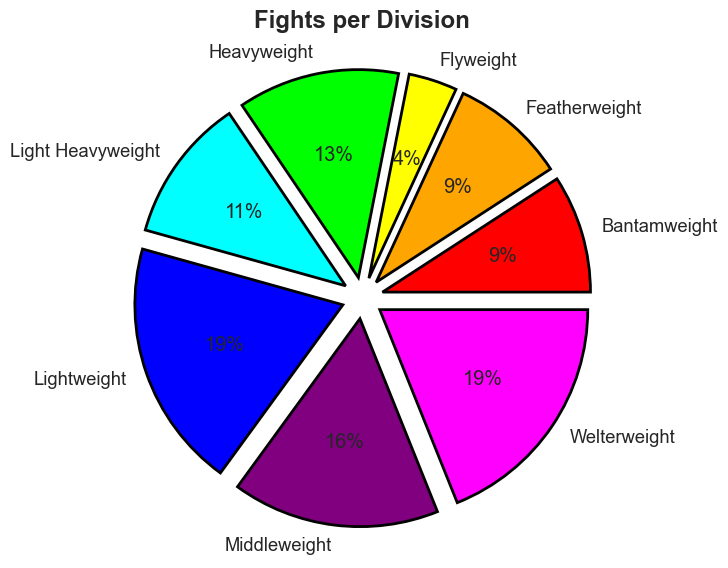

In [1021]:
colors = ['red', 'orange', 'yellow', 'lime', 'cyan', 'blue', 'purple', 'magenta']
plt.figure(figsize=(8,6))

plt.pie(x=fight_details["total_fights"], labels=fight_details.index, colors=colors, autopct='%.0f%%',
            explode=[0.1 for i in fight_details.index], wedgeprops={'linewidth':2, 'edgecolor':'black'}, labeldistance=1.1)

plt.tight_layout(pad=2, w_pad=3, h_pad=3)
plt.suptitle("Fights per Division", weight='bold')
plt.show()

In [1022]:
df_fights["control_opponent"] = df_fights["control"]/df_fights["control_differential"]
df_fights["control_total"] = df_fights["control"] + df_fights["control_opponent"]
df_fights["clear_time_on_feet"] = df_fights["total_comp_time"] - df_fights["control_total"]
df_fights["standup_strikes_per_min"] =(df_fights["total_strikes_attempts"]/df_fights["clear_time_on_feet"])*60

fights_grouped = df_fights.groupby("fight_url")[["control","total_comp_time", "division"]].agg({"control": "sum", "total_comp_time":"sum", "division": "first"})
fights_grouped["total_comp_time"] = fights_grouped["total_comp_time"].apply(lambda x: x//2)
fights_grouped["time_standup"] = fights_grouped["total_comp_time"] - fights_grouped["control"]

fights_grouped = fights_grouped[["division", "time_standup", "control"]]
fights_grouped = pd.melt(fights_grouped, id_vars=["division"], value_vars =['time_standup', 'control'])

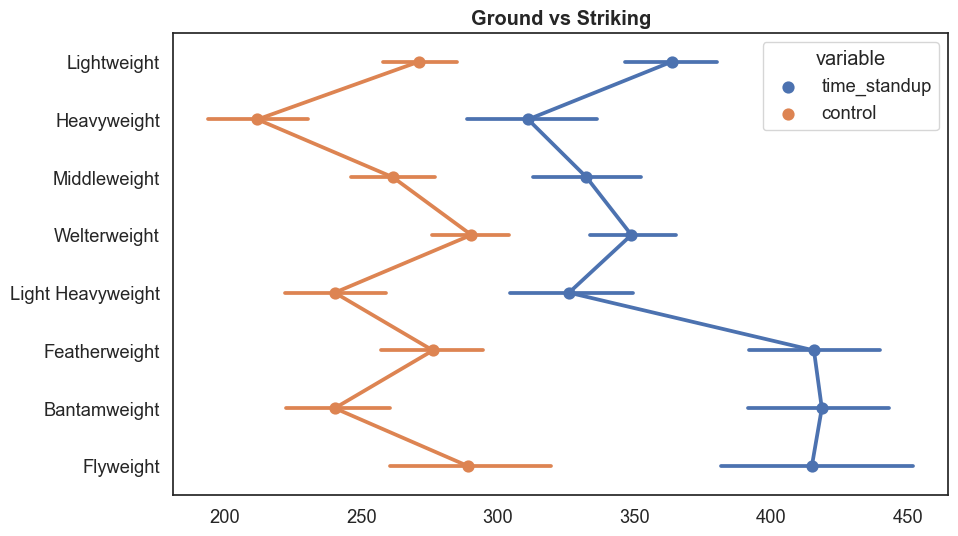

In [1023]:
plt.figure(figsize=(10,6))
g = sns.pointplot(data=fights_grouped, x="value", y="division", hue="variable", order=weights)
g.set_xlabel("")
g.set_ylabel("")
g.set_title('Ground vs Striking', weight='bold')
plt.show()

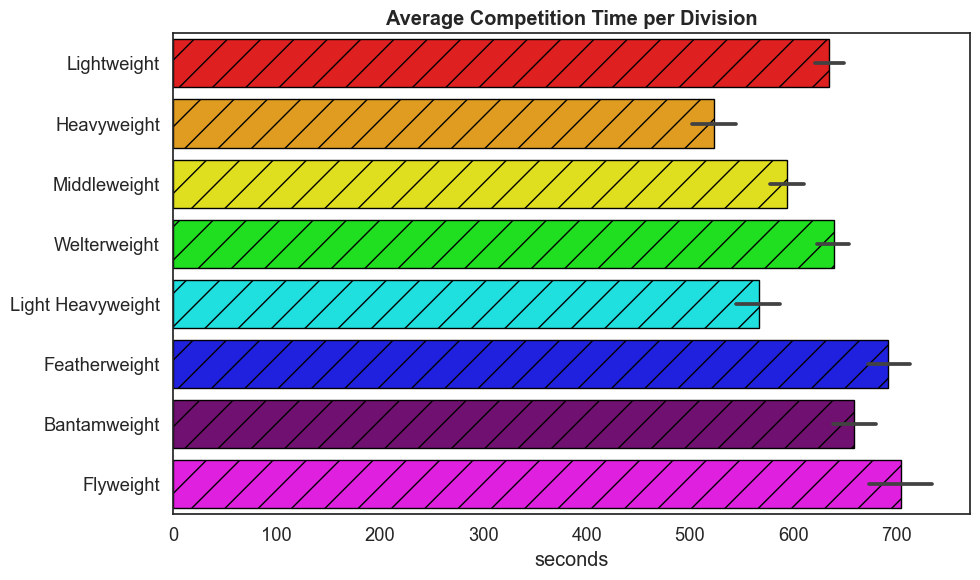

In [1024]:
plt.figure(figsize=(10,6))
g = sns.barplot(x="total_comp_time", y ="division", data=df_fights, order=weights, palette = colors,edgecolor="black", hatch='/')
g.set_xlabel("seconds")
g.set_ylabel(None)
g.set_title('Average Competition Time per Division', weight='bold')
plt.tight_layout(pad=1, w_pad=1, h_pad=1)
plt.show()

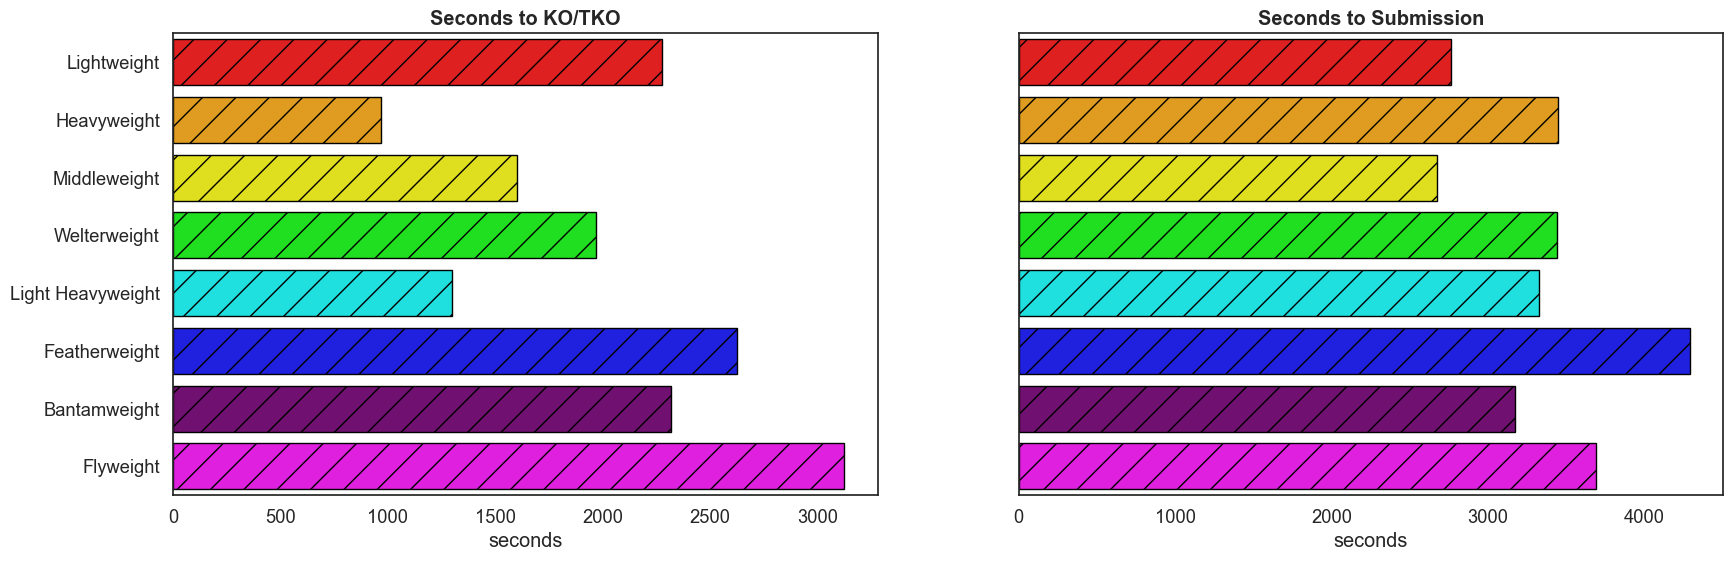

In [1025]:
fig, axes = plt.subplots(1, 2, sharey=True,figsize=(20,6))
g0 = sns.barplot(y=fight_details.index, x="KO/TKO_time", data=fight_details, order=weights, ax=axes[0], palette=colors, edgecolor="black", hatch='/')
g1 = sns.barplot(y=fight_details.index, x="sub/time", data=fight_details, order=weights, ax=axes[1], palette=colors, edgecolor="black", hatch='/')
g0.set_ylabel('')
g0.set_xlabel('seconds')
g1.set_ylabel('')
g1.set_xlabel('seconds')
axes[0].set_title('Seconds to KO/TKO',weight='bold')
axes[1].set_title('Seconds to Submission',weight='bold')
plt.show()

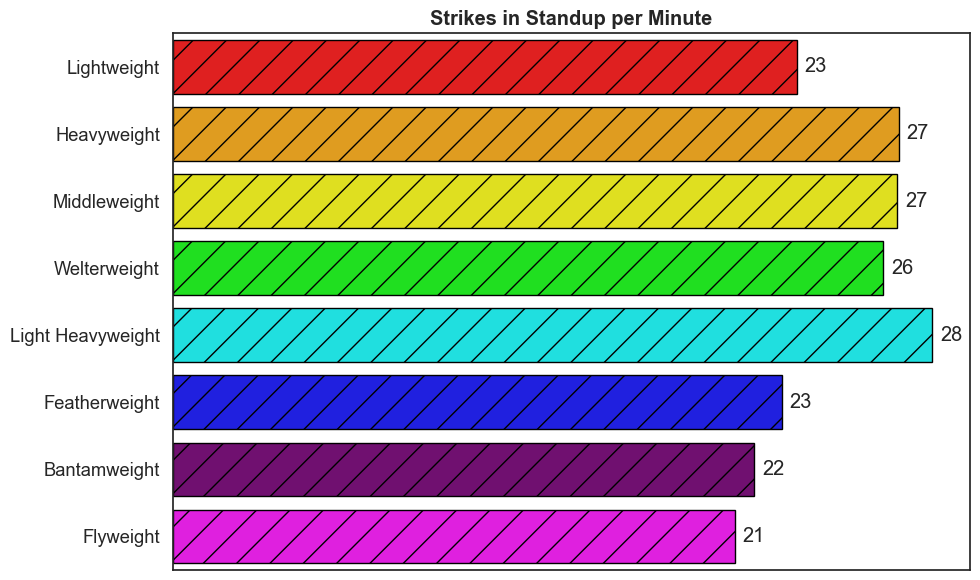

In [1026]:
plt.figure(figsize=(10,6))
g = sns.barplot(x="standup_strikes_per_min", y="division", data=df_fights, order=weights, edgecolor="black", palette=colors, hatch='/', errorbar=None)

for p in g.patches:
    g.text((p.get_x()+p.get_width()+0.3), (p.get_y()+p.get_height()/2), (round(p.get_width(),0)).astype(int), ha='left', va='center')

g.set(xticklabels=[])
g.set(xlabel=None, ylabel=None)
g.set_title('Strikes in Standup per Minute',weight='bold')
plt.tight_layout(pad=1, w_pad=1, h_pad=1)
plt.show()

In [1027]:
df_fights["strikes_sig_opponent"] = df_fights["sig_strikes_landed"] / df_fights["sig_strikes_landed_differential"]
df_fights["control_diff"] = df_fights["control"] - df_fights["control_opponent"] 
df_fights["strike_diff_sig"] = df_fights["sig_strikes_landed"] - df_fights["strikes_sig_opponent"] 

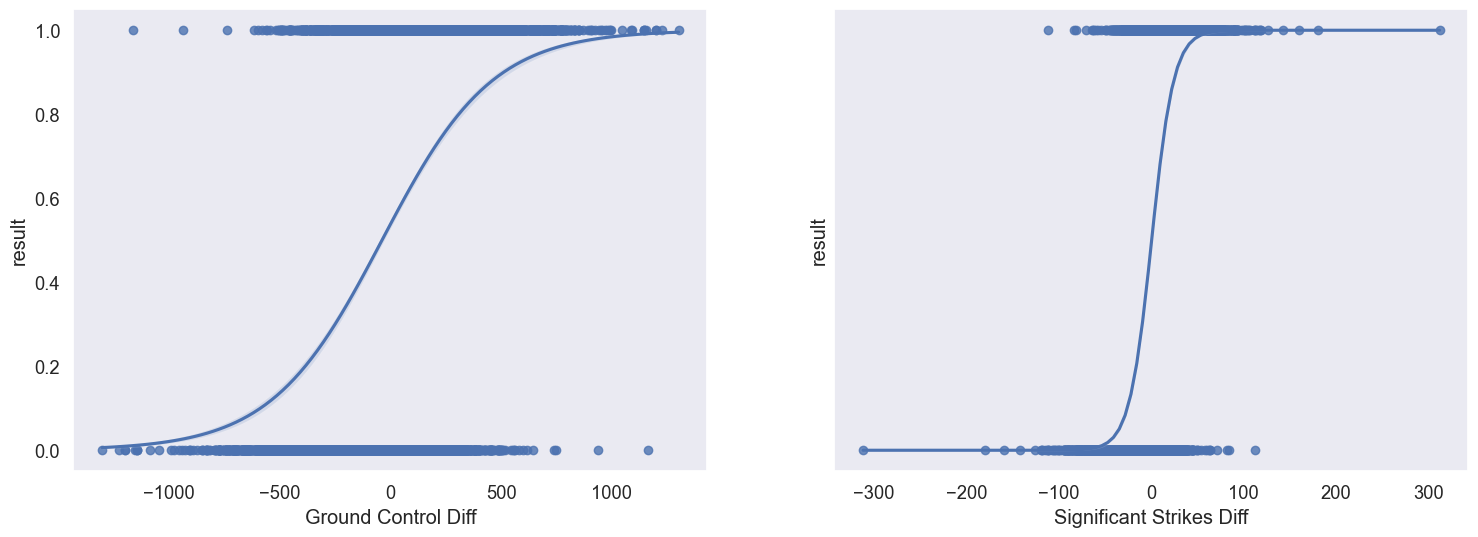

In [1028]:
sns.set_style("dark")
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(18,6))

g=sns.regplot(x="control_diff", y="result", data=df_fights, logistic=True, ax=axes[0])
g.set(xlabel="Ground Control Diff")

g1=sns.regplot(x="strike_diff_sig", y="result", data=df_fights, logistic=True, ax=axes[1])
g1.set(xlabel="Significant Strikes Diff")
plt.show()

<Figure size 1200x600 with 0 Axes>

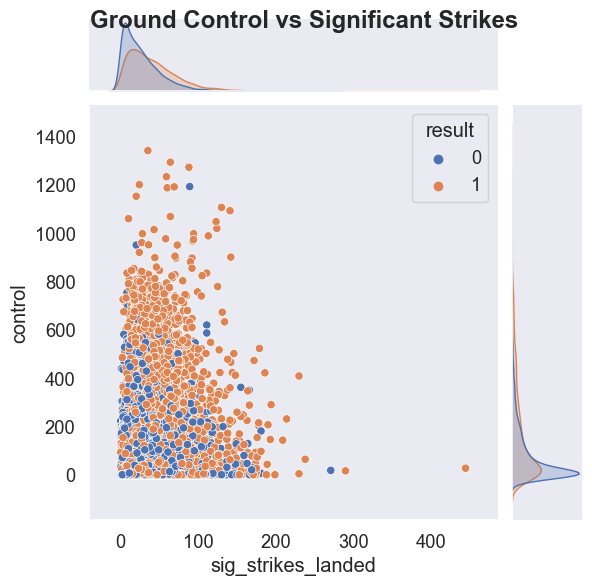

In [1029]:
plt.figure(figsize=(12,6))
g = sns.jointplot(data=df_fights, x="sig_strikes_landed", y="control", hue="result")
plt.suptitle('Ground Control vs Significant Strikes', weight='bold')
plt.show()

# Building Model
We now start cleaning the data and preparing needed functions for the machine learning model.

In [1030]:
df_ufc_fighters = df_ufc_fighters.drop("country", axis=1)
df_ufc_fighters["num_matches"] = df_ufc_fighters.fighter.map(df_fights.fighter.value_counts())
df_ufc_fighters = df_ufc_fighters.drop_duplicates("fighter")
df_ufc_fighters = df_ufc_fighters.set_index("fighter")
df_fighters_analyze = pd.DataFrame(df_ufc_fighters.index[df_ufc_fighters["num_matches"]>3])
df_fighters_analyze.isna().sum()

fighter    0
dtype: int64

In [1031]:
def skills(fighter_name):
  num_fights = df_ufc_fighters.loc[fighter_name]["num_matches"]
  total_time = df_fights["total_comp_time"][(df_fights["fighter"]==fighter_name)].sum()
  ground_control_time = df_fights["control"][(df_fights["fighter"]==fighter_name)].sum()
  standup_time = total_time - df_fights["control"][(df_fights["fighter"]==fighter_name)].sum()

  def ground_skills_defense():    
    ratio_sub_losses = (df_fights["result"][(df_fights["fighter"]==fighter_name) & (df_fights["result"]==0) & (df_fights["method"]=="SUB")].count())/num_fights    
    ratio_op_control = (df_fights["control_opponent"][(df_fights["fighter"]==fighter_name)].sum())/total_time
    g_a_p = df_fights["ground_strikes_def"][(df_fights["fighter"]==fighter_name)].mean()/100
    takedown = df_fights["takedowns_def"][df_fights["fighter"]==fighter_name].mean()/100
    skill_reversal = (df_fights["reversals"][df_fights["fighter"]==fighter_name].sum()/num_fights)
    skill_total = (takedown + skill_reversal - (ratio_sub_losses*2) + g_a_p) * (1-ratio_op_control)
    return max(skill_total, 0)
    
  def ground_skills_attack():    
    ratio_sub_winner = (df_fights["result"][(df_fights["fighter"]==fighter_name) & (df_fights["result"]==1) & (df_fights["method"]=="SUB")].count())/num_fights   
    coef_ground_control = (1-(ground_control_time/total_time))
    g_a_p = df_fights["ground_strikes_landed"][(df_fights["fighter"]==fighter_name)].sum()/total_time
    takedown = df_fights[df_fights["fighter"]==fighter_name]["takedowns_accuracy"].mean()/100
    return (takedown + g_a_p + (ratio_sub_winner*2))/coef_ground_control  

  def standing_skills_defense():
    ratio_ko_losses = (df_fights["result"][(df_fights["fighter"]==fighter_name) & (df_fights["result"]==0) & (df_fights["method"]=="KO/TKO")].count())/num_fights      
    strikes_sig = df_fights["sig_strikes_def"][(df_fights["fighter"]==fighter_name)].mean()/100
    strikes_clinch =df_fights[df_fights["fighter"]==fighter_name]["clinch_strikes_def"].mean()/100     
    strikes_distance = df_fights[df_fights["fighter"]==fighter_name]["distance_strikes_def"].mean()/100    
    skill_total = (strikes_clinch-ratio_ko_losses*2 + strikes_distance + strikes_sig)*(standup_time/total_time)
    return max(skill_total, 0)

# ratio at beggining, strikes at beggining, made sure not to change column names
  def standing_skills_attack():
    ratio_ko_wins = (df_fights["result"][(df_fights["fighter"]==fighter_name) & (df_fights["result"]==1) & (df_fights["method"]=="KO/TKO")].count())/num_fights   
    strikes_ground = df_fights["ground_strikes_attempts"][df_fights["fighter"]==fighter_name].sum()
    clinch = df_fights[df_fights["fighter"]==fighter_name]["clinch_strikes_landed"].sum()/standup_time/df_fights[df_fights["fighter"]==fighter_name]["clinch_strikes_accuracy"].mean()/100
    strikes_sig_eff = (df_fights["sig_strikes_landed"][(df_fights["fighter"]==fighter_name)].sum()-strikes_ground)/standup_time
    accuracy = (df_fights[df_fights["fighter"]==fighter_name]["total_strikes_accuracy"].mean() + df_fights[df_fights["fighter"]==fighter_name]["distance_strikes_accuracy"].mean())/200
    hand_speed =(df_fights[df_fights["fighter"]==fighter_name]["total_strikes_attempts"].sum() - strikes_ground)/standup_time
    return ((ratio_ko_wins*2) + clinch + (strikes_sig_eff + accuracy + hand_speed)/2)
  
  def stamina():
    fights_second_round = max(df_fights["result"][(df_fights["fighter"]==fighter_name) & (df_fights["total_comp_time"]>300) & (df_fights["total_comp_time"]<=600)].count(),1)
    fights_third_round = max(df_fights["result"][(df_fights["fighter"]==fighter_name) & (df_fights["total_comp_time"]>600) & (df_fights["total_comp_time"]<=900)].count(),1)
    fights_champ_round = max(df_fights["result"][(df_fights["fighter"]==fighter_name) & (df_fights["total_comp_time"]>900)].count(),1)
   
    wins_second_round = df_fights["result"][(df_fights["fighter"]==fighter_name) & (df_fights["total_comp_time"]>300) & (df_fights["total_comp_time"]<=600)].sum()
    wins_third_round = df_fights["result"][(df_fights["fighter"]==fighter_name) & (df_fights["total_comp_time"]>600) & (df_fights["total_comp_time"]<=900)].sum()
    wins_champ_round = df_fights["result"][(df_fights["fighter"]==fighter_name) & (df_fights["total_comp_time"]>900)].sum()

    return (np.array([(0.2*wins_second_round/fights_second_round),(0.6*wins_third_round/fights_third_round),(wins_champ_round/fights_champ_round)])).sum()
    
  return (ground_skills_defense(),ground_skills_attack(),standing_skills_defense(), standing_skills_attack() ,stamina())

In [1032]:
def form_fight_date(fighter_name, fight_date):
  score = 0
  coef = 0.1
  results_all = ''
  result = ['loss' if x!=1 else 'win' for x in df_fights['result'][(df_fights['fighter']==fighter_name) & (df_fights['date']<fight_date)]]
  for r in result[:-6:-1]:
    if r =='win': score += coef
    else: score -= coef
    coef += 0.1  
    results_all += r + ' '
  return (results_all[:-1],score)

In [1033]:
df_fighters_analyze[["ground_def_skill","ground_att_skill", "stand_def_skill","stand_att_skill", "stamina"]] = df_fighters_analyze["fighter"].apply(skills).apply(pd.Series).astype(float)
df_fighters_analyze["stand_att_skill"] = df_fighters_analyze['stand_att_skill'].fillna(0)

In [1034]:
df_fights_analyze = df_fights[["date", "fighter","opponent","result","method"]]

df_fights_analyze["form_score_fighter"] = df_fights_analyze.apply(lambda x:form_fight_date(x.fighter, x.date)[1], axis=1).astype(float)
df_fights_analyze["form_score_opponent"] = df_fights_analyze.apply(lambda x:form_fight_date(x.opponent, x.date)[1], axis=1).astype(float)

df_fights_analyze = df_fights_analyze.merge(df_fighters_analyze, on="fighter", how="inner")
df_fights_analyze = df_fights_analyze.merge(df_fighters_analyze, right_on="fighter", left_on="opponent", how="inner", suffixes=("_fighter","_opponent"))
df_fights_analyze = df_fights_analyze.drop("fighter_opponent", axis=1)
df_fights_analyze.head()

/var/folders/lr/9shq1r9s57vf_nvhtv2tw4xc0000gn/T/ipykernel_76977/1689837959.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fights_analyze["form_score_fighter"] = df_fights_analyze.apply(lambda x:form_fight_date(x.fighter, x.date)[1], axis=1).astype(float)
/var/folders/lr/9shq1r9s57vf_nvhtv2tw4xc0000gn/T/ipykernel_76977/1689837959.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fights_analyze["form_score_opponent"] = df_fights_analyze.apply(lambda x:form_fight_date(x.opponent, x.date)[1], axis

,date,fighter_fighter,opponent,result,method,form_score_fighter,form_score_opponent,ground_def_skill_fighter,ground_att_skill_fighter,stand_def_skill_fighter,stand_att_skill_fighter,stamina_fighter,ground_def_skill_opponent,ground_att_skill_opponent,stand_def_skill_opponent,stand_att_skill_opponent,stamina_opponent
0,1998-03-13,Jerry Bohlander,Kevin Jackson,1,SUB,0.3,0.4,1.204018,2.001237,1.810119,0.212740,0.3,0.750000,1.523377,2.238971,0.000000,0.000000
1,1997-07-27,Tony Fryklund,Kevin Jackson,0,SUB,0.0,0.0,0.342785,1.868140,1.014574,0.828202,0.2,0.750000,1.523377,2.238971,0.000000,0.000000
2,1997-12-21,Frank Shamrock,Kevin Jackson,1,SUB,0.0,0.3,1.238585,1.415141,2.367848,1.230637,1.2,0.750000,1.523377,2.238971,0.000000,0.000000
3,1999-01-08,Jerry Bohlander,Tito Ortiz,0,KO/TKO,0.6,0.1,1.204018,2.001237,1.810119,0.212740,0.3,1.305347,1.143868,0.990854,0.928138,0.839394
4,2005-02-05,Vitor Belfort,Tito Ortiz,0,S-DEC,0.5,0.5,1.025646,0.296940,1.218947,1.165237,0.2,1.305347,1.143868,0.990854,0.928138,0.839394


In [1035]:
# Regression 
X = df_fights_analyze[["ground_def_skill_fighter","ground_att_skill_fighter","stand_att_skill_fighter","stand_def_skill_fighter","stamina_fighter","form_score_fighter",
                      "ground_def_skill_opponent", "ground_att_skill_opponent", "stand_att_skill_opponent","stand_def_skill_opponent","stamina_opponent", "form_score_opponent" ]]
y = df_fights_analyze["result"]

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=21)

# Machine Learning: 
First we define the performance metrics and instantiate the machine learning classifiers. Then, we can define the function to evaluate the models and get the best score where X is the data set features, y is the data set target, and folds are the number of cross-validation folds.

In the end, we see that logistic regression is the best model, so we continue with that below.

In [1036]:
scoring = {'accuracy':make_scorer(accuracy_score), 
           'precision':make_scorer(precision_score),
           'recall':make_scorer(recall_score), 
           'f1_score':make_scorer(f1_score)}

model_dtr = DecisionTreeClassifier()
model_gnb = GaussianNB()
model_log = LogisticRegression(max_iter=10000)
model_rfc = RandomForestClassifier()
model_svc = LinearSVC(dual=False)

def evaluate_models(X, y, folds):
    dtr = cross_validate(model_dtr, X, y, cv=folds, scoring=scoring)
    gnb = cross_validate(model_gnb, X, y, cv=folds, scoring=scoring)
    log = cross_validate(model_log, X, y, cv=folds, scoring=scoring)
    rfc = cross_validate(model_rfc, X, y, cv=folds, scoring=scoring)
    svc = cross_validate(model_svc, X, y, cv=folds, scoring=scoring)

    df_models_scores = pd.DataFrame(
        {'Decision Tree':[dtr['test_accuracy'].mean(),dtr['test_precision'].mean(),dtr['test_recall'].mean(),dtr['test_f1_score'].mean()],                       
         'Logistic Regression':[log['test_accuracy'].mean(),log['test_precision'].mean(),log['test_recall'].mean(),log['test_f1_score'].mean()],                       
         'Gaussian Naive Bayes':[gnb['test_accuracy'].mean(),gnb['test_precision'].mean(),gnb['test_recall'].mean(),gnb['test_f1_score'].mean()],                            
         'Random Forest':[rfc['test_accuracy'].mean(),rfc['test_precision'].mean(),rfc['test_recall'].mean(),rfc['test_f1_score'].mean()],                          
         'Support Vector Classifier':[svc['test_accuracy'].mean(),svc['test_precision'].mean(),svc['test_recall'].mean(),svc['test_f1_score'].mean()]},
         index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
    
    df_models_scores['Best Score'] = df_models_scores.idxmax(axis=1)
    return(df_models_scores)
  
evaluate_models(xtrain, ytrain, 100)

,Decision Tree,Logistic Regression,Gaussian Naive Bayes,Random Forest,Support Vector Classifier,Best Score
Accuracy,0.602895,0.709394,0.685024,0.681320,0.707406,Logistic Regression
Precision,0.593310,0.710785,0.685420,0.681741,0.708644,Logistic Regression
Recall,0.595748,0.686017,0.659924,0.655311,0.683681,Logistic Regression
F1 Score,0.592708,0.696156,0.670347,0.665999,0.693938,Logistic Regression


In [1038]:
logreg = LogisticRegression()
logreg.fit(xtrain, ytrain)

print("Accuracy - Training : ",round(logreg.score(xtrain, ytrain)*100, 2), "%")
print("Accuracy - Model    : ",round(accuracy_score(logreg.predict(xtest), ytest)*100, 2), "%")

Accuracy - Training :  70.99 %
Accuracy - Model    :  70.01 %


In [1039]:
df_fighters_normalized = df_fighters_analyze.copy()
df_fighters_normalized.iloc[:,1:] = preprocessing.normalize(df_fighters_normalized.iloc[:,1:])
df_fighters_normalized.iloc[:,1:] = df_fighters_normalized.iloc[:,1:].apply(lambda x:round(x*100,0)) 
df_fighters_normalized = df_fighters_normalized.set_index('fighter')
df_fighters_normalized.describe()

,ground_def_skill,ground_att_skill,stand_def_skill,stand_att_skill,stamina
count,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000
mean,52.866113,32.473684,53.815328,34.800554,21.348107
std,17.007490,22.815462,18.513548,15.424640,14.077543
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,44.000000,15.000000,42.000000,22.000000,12.000000
50%,55.000000,28.000000,56.000000,34.000000,20.000000
75%,64.000000,49.000000,66.000000,45.000000,28.000000
max,96.000000,97.000000,96.000000,87.000000,71.000000


In [1040]:
def proba(fighter,opponent):
  form_fighter = form(fighter,"2022-12-12")
  form_opponent = form(opponent,"2022-12-12")
    
  fighter1 = df_fighters_analyze[df_fighters_analyze.fighter==fighter].copy()
  fighter1.loc[:,'form_score'] = form_fighter[1]
    
  opponent2 = df_fighters_analyze[df_fighters_analyze.fighter==opponent].copy()
  opponent2.loc[:,'form_score'] = form_opponent[1]
    
  fighter1.loc[:,"opponent"] = opponent

  fighter1=fighter1.merge(opponent2, right_on="fighter", left_on="opponent", how="inner", suffixes=("_fighter","_opponent"))
    
  fighter1=fighter1.loc[:,["ground_def_skill_fighter","ground_att_skill_fighter","stand_att_skill_fighter","stand_def_skill_fighter","stamina_fighter","form_score_fighter",
                      "ground_def_skill_opponent", "ground_att_skill_opponent", "stand_att_skill_opponent","stand_def_skill_opponent","stamina_opponent", "form_score_opponent"]]  
  
  probabilities = logreg.predict_proba(fighter1)
  percentage_fighter = "Probability of winning: " + fighter + " " + format(probabilities[0][1] * 100, ".2f") + " %"
  percentage_opponent = "Probability of winning: " + opponent + " " + format(probabilities[0][0] * 100, ".2f") + " %"
  
  return percentage_fighter,percentage_opponent

In [1041]:
proba('Conor McGregor','Khabib Nurmagomedov')

('Probability of winning: Conor McGregor 20.77 %',
 'Probability of winning: Khabib Nurmagomedov 79.23 %')